In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/diabetes.csv')

# features (X) and target (y)
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Handling missing values
data.fillna(data.mean(), inplace=True)


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


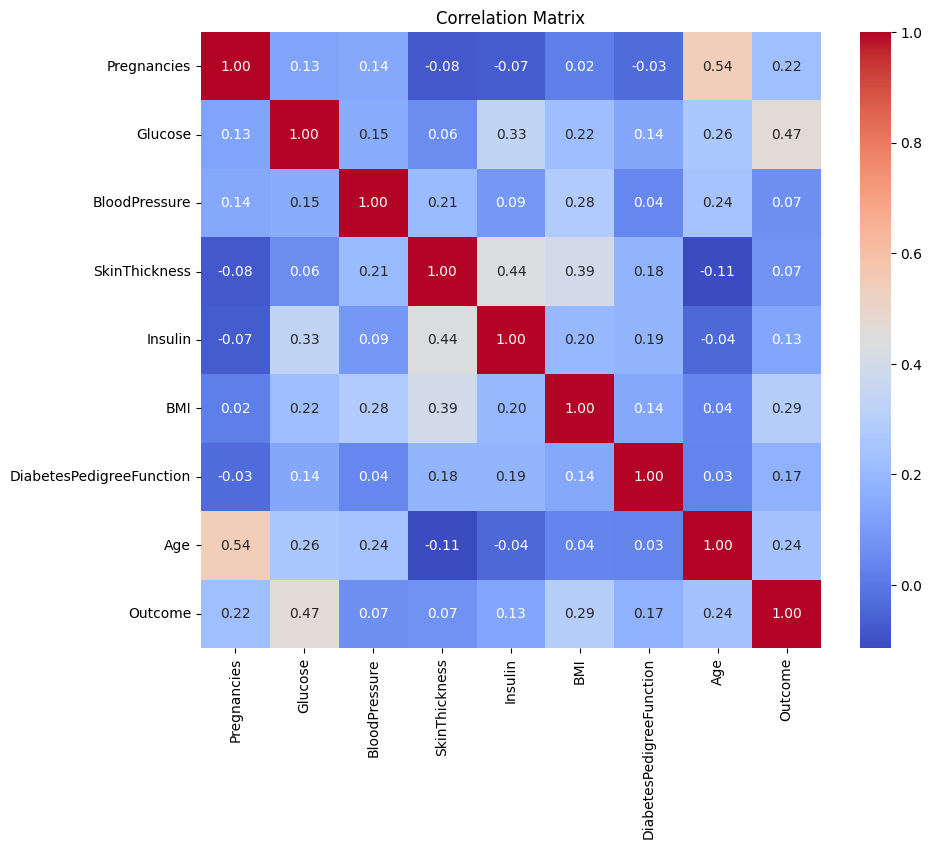

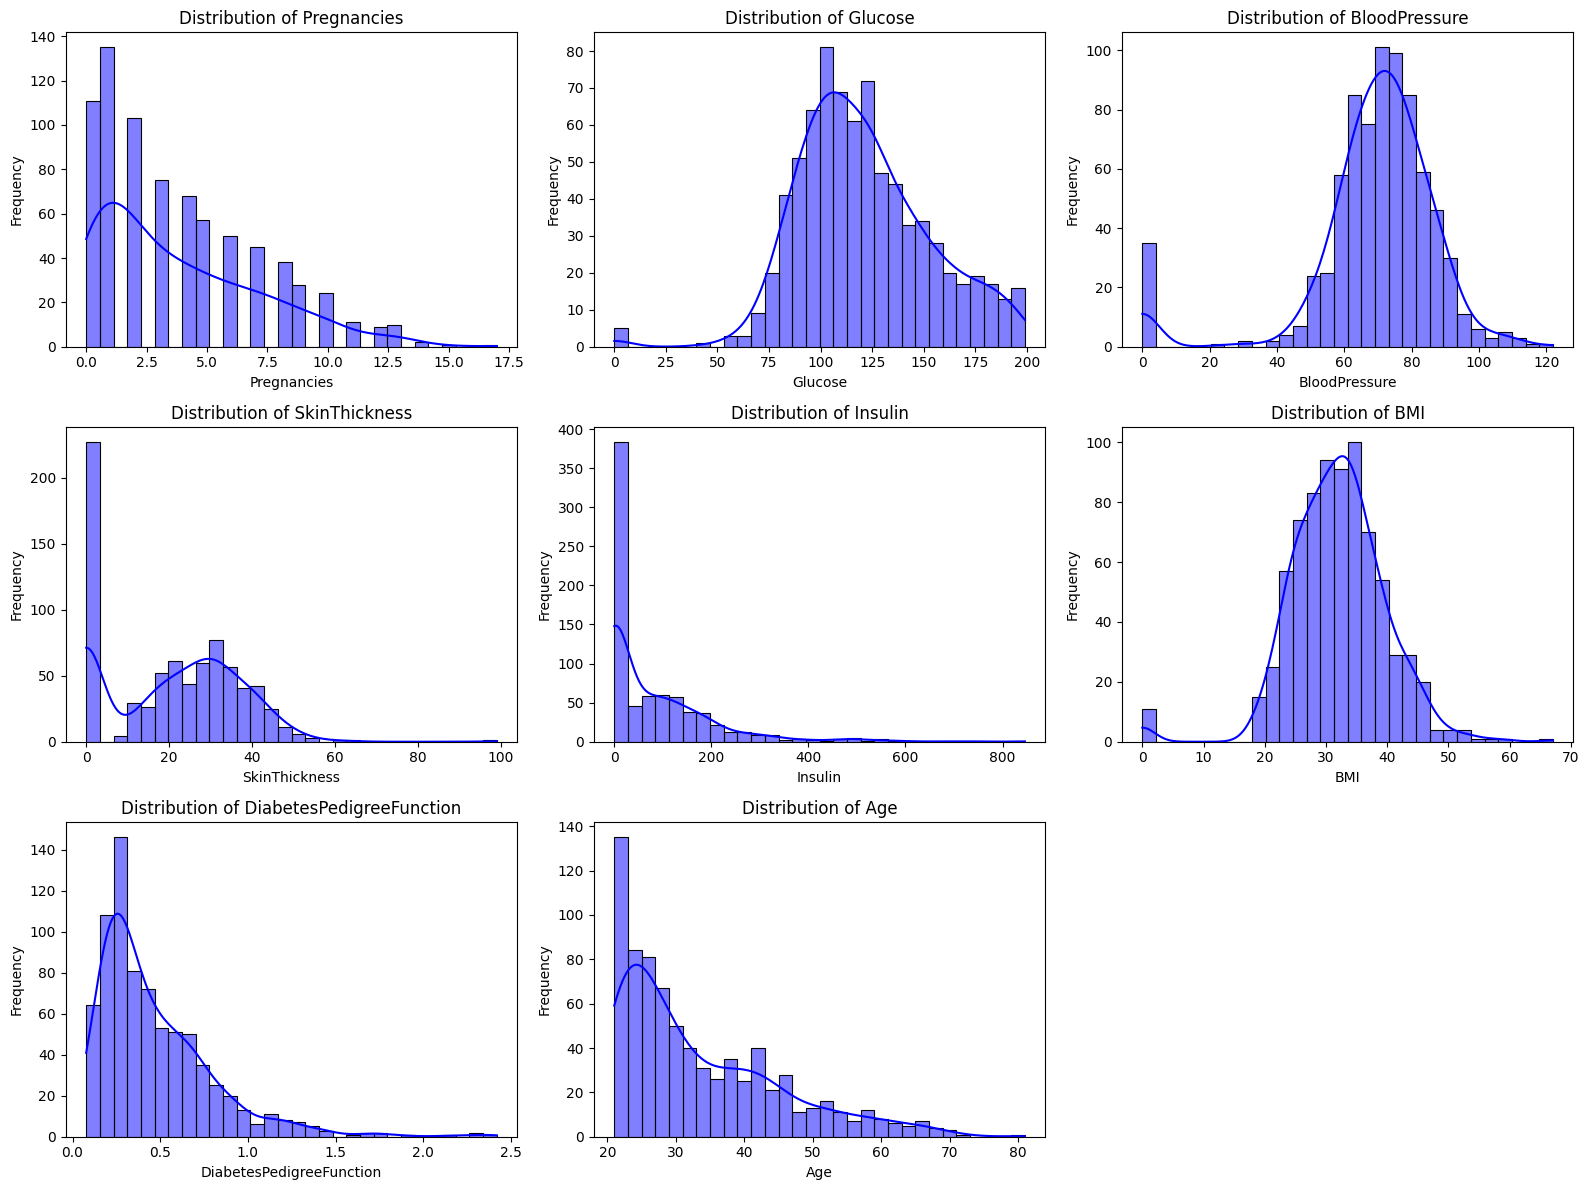

In [ ]:
# Visualization
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

# Feature Distribution Plots
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
plt.figure(figsize=(16, 12))
for i, col in enumerate(feature_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[col], kde=True, color='blue', bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

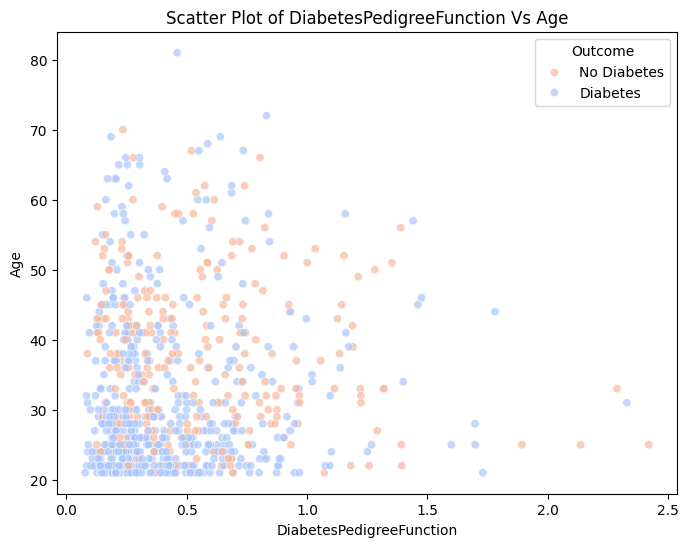

In [ ]:
# Scatter plot of Glucose vs BMI colored by Outcome
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='DiabetesPedigreeFunction', y='Age', hue='Outcome', palette='coolwarm', alpha=0.7)
plt.title("Scatter Plot of DiabetesPedigreeFunction Vs Age")
plt.xlabel("DiabetesPedigreeFunction")
plt.ylabel("Age")
plt.legend(title='Outcome', labels=['No Diabetes', 'Diabetes'])
plt.show()

In [ ]:
#MODEL 1 (Logistics Regression)
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train)

y_pred=reg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Training Score:\n", reg.score(X_train, y_train) * 100)
print("Mean Squared Error:\n", mean_squared_error(y_test, y_pred))
print("R2 score is:\n", r2_score(y_test, y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Confusion Matrix:
 [[78 21]
 [18 37]]
Training Score:
 77.0358306188925
Mean Squared Error:
 0.2532467532467532
R2 score is:
 -0.10303030303030325


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

74.67532467532467


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are already defined
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.64
Recall: 0.67
F1-Score: 0.65


In [ ]:
#KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

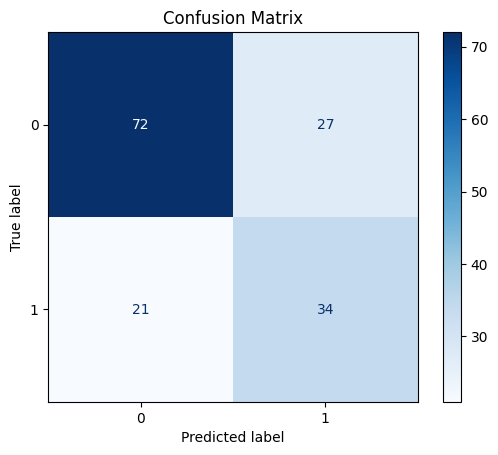

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred=knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
unique_labels = sorted(set(y_test))

# Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Training Score:\n",knn.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75        99
           1       0.56      0.62      0.59        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.69       154

Training Score:
 79.31596091205212
Mean Squared Error:
 0.3116883116883117
R2 score is:
 -0.3575757575757579


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

68.83116883116884


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are already defined
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.56
Recall: 0.62
F1-Score: 0.59


In [ ]:
#Naives Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

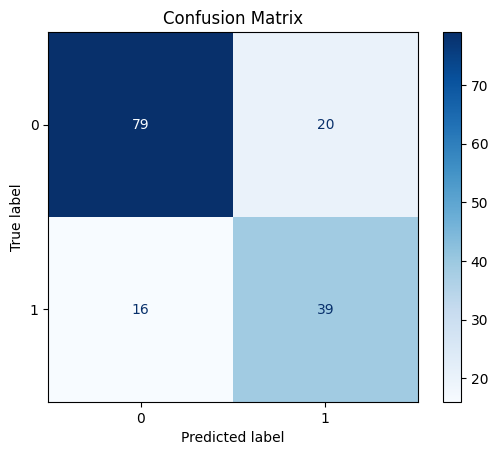

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


y_pred=gnb.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
unique_labels = sorted(set(y_test))

# Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Training Score:\n",gnb.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

Training Score:
 75.2442996742671
Mean Squared Error:
 0.23376623376623376
R2 score is:
 -0.01818181818181852


In [ ]:
print("Accuracy Score:\n",gnb.score(X_train,y_train)*100)

Accuracy Score:
 75.2442996742671


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are already defined
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.66
Recall: 0.71
F1-Score: 0.68


In [ ]:
#4 tREE Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

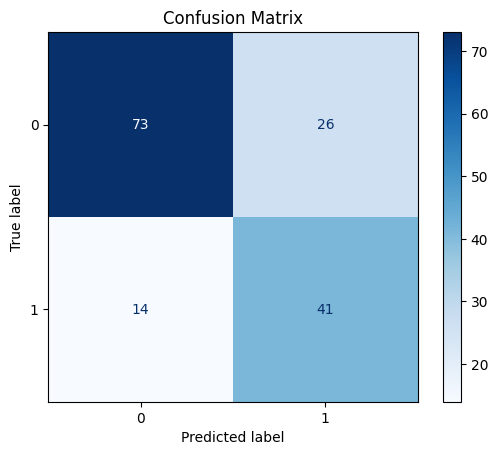

In [ ]:
from os import XATTR_CREATE
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred = dtree.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
unique_labels = sorted(set(y_test))

# Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Training Score:\n",dtree.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.74      0.78        99
           1       0.61      0.75      0.67        55

    accuracy                           0.74       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.74      0.74       154

Training Score:
 85.83061889250814
Mean Squared Error:
 0.2597402597402597
R2 score is:
 -0.13131313131313171


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

74.02597402597402


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are already defined
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.61
Recall: 0.75
F1-Score: 0.67


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

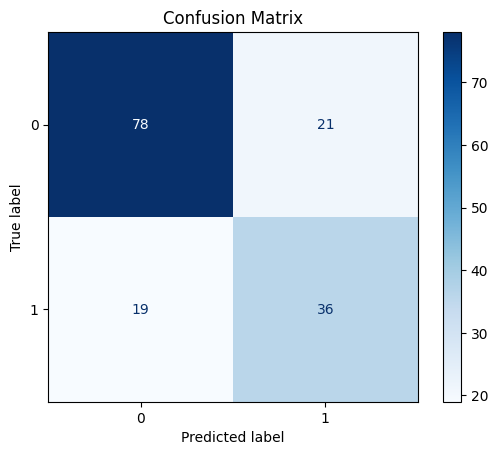

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

y_pred=rfc.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
unique_labels = sorted(set(y_test))

# Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Training Score:\n",rfc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154

Training Score:
 100.0
Mean Squared Error:
 0.2597402597402597
R2 score is:
 -0.13131313131313171


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

74.02597402597402


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.63
Recall: 0.65
F1-Score: 0.64


In [ ]:
#6 SVC
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

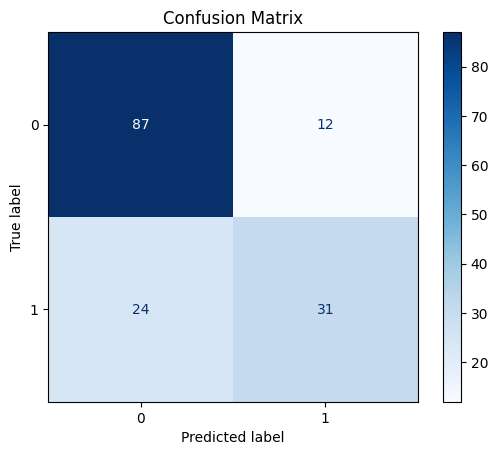

In [ ]:
y_pred=svc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


y_pred=svc.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
unique_labels = sorted(set(y_test))

# Confusion Matrix Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Training Score:\n",svc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83        99
           1       0.72      0.56      0.63        55

    accuracy                           0.77       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.76      0.77      0.76       154

Training Score:
 76.8729641693811
Mean Squared Error:
 0.23376623376623376
R2 score is:
 -0.01818181818181852


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

76.62337662337663


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming y_test and y_pred are already defined
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Precision: 0.72
Recall: 0.56
F1-Score: 0.63
